In [ ]:
# Import libraries
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.applications.vgg16 import VGG16
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Defining image size and training and validation data path
IMAGE_SIZE = [224, 224]

train_data_path = '/content/drive/MyDrive/final_dataset/train'
validation_data_path = '/content/drive/MyDrive/final_dataset/valid'

In [ ]:
# Performing data augmentation on training data
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

training_data = training_datagen.flow_from_directory(train_data_path,
                                      target_size=(224, 224), 
                                      batch_size=16,
                                      class_mode='categorical') 

Found 43273 images belonging to 25 classes.


In [ ]:
# Performing data augmentation on validation data
valid_datagen = ImageDataGenerator(rescale=1./255)

valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(224,224),
                                  batch_size=16,
                                  class_mode='categorical')

Found 6145 images belonging to 25 classes.


In [ ]:
training_data.class_indices

{'apple': 0,
 'banana': 1,
 'buildings': 2,
 'cat': 3,
 'cow': 4,
 'daisy': 5,
 'dandelion': 6,
 'dog': 7,
 'elephant': 8,
 'forest': 9,
 'glacier': 10,
 'guava': 11,
 'horse': 12,
 'kiwi': 13,
 'mango': 14,
 'mountain': 15,
 'muskmelon': 16,
 'orange': 17,
 'pitaya': 18,
 'rose': 19,
 'sea': 20,
 'squirrel': 21,
 'street': 22,
 'sunflower': 23,
 'tulip': 24}

In [ ]:
# save best model using vall accuracy
model_path = '/content/drive/MyDrive/model_vgg16.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
# Loading pretrained model
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
# freezing base model weights
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
# getting number of output classes
folders = glob('/content/drive/MyDrive/final_dataset/train/*')

In [ ]:
# our layers
x = Flatten()(vgg16.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# train model
history = model.fit(training_data,
                           epochs=25,
                           verbose=1,
                           validation_data= valid_data,
                           callbacks=callbacks_list)

Epoch 1/25
2705/2705 [==============================] - 12927s 5s/step - loss: 1.5278 - accuracy: 0.6308 - val_loss: 0.7828 - val_accuracy: 0.8436

Epoch 00001: val_accuracy improved from -inf to 0.84361, saving model to /content/drive/MyDrive/model_vgg16.h5
Epoch 2/25
2705/2705 [==============================] - 677s 250ms/step - loss: 1.2563 - accuracy: 0.7605 - val_loss: 0.9632 - val_accuracy: 0.8426

Epoch 00002: val_accuracy did not improve from 0.84361
Epoch 3/25
2705/2705 [==============================] - 674s 249ms/step - loss: 1.2570 - accuracy: 0.7888 - val_loss: 0.9616 - val_accuracy: 0.8571

Epoch 00003: val_accuracy improved from 0.84361 to 0.85712, saving model to /content/drive/MyDrive/model_vgg16.h5
Epoch 4/25
2705/2705 [==============================] - 669s 247ms/step - loss: 1.2503 - accuracy: 0.8024 - val_loss: 1.0542 - val_accuracy: 0.8565

Epoch 00004: val_accuracy did not improve from 0.85712
Epoch 5/25
2705/2705 [==============================] - 676s 250ms/ste

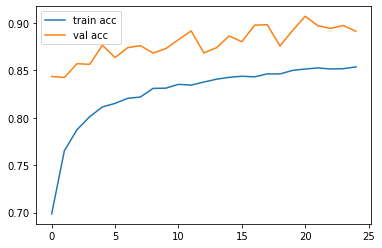

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')